In [109]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import GRU


In [4]:
passageiros = pd.read_csv('./Data/Passageiros.csv')

passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

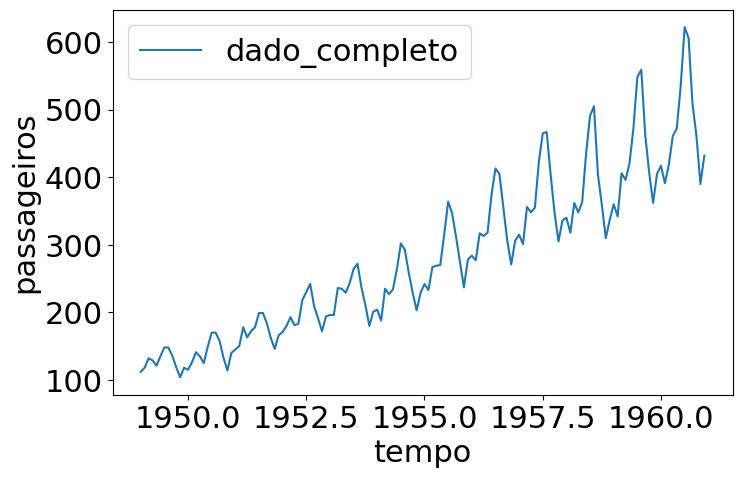

In [21]:
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['font.size'] = 22
sns.lineplot(x="tempo", y="passageiros", data = passageiros,label ='dado_completo')


## Escalando os dados     

In [33]:
sc = StandardScaler()

sc.fit(passageiros) 

dado_escalado = sc.transform(passageiros)

x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

Text(0.5, 0, 'Data')

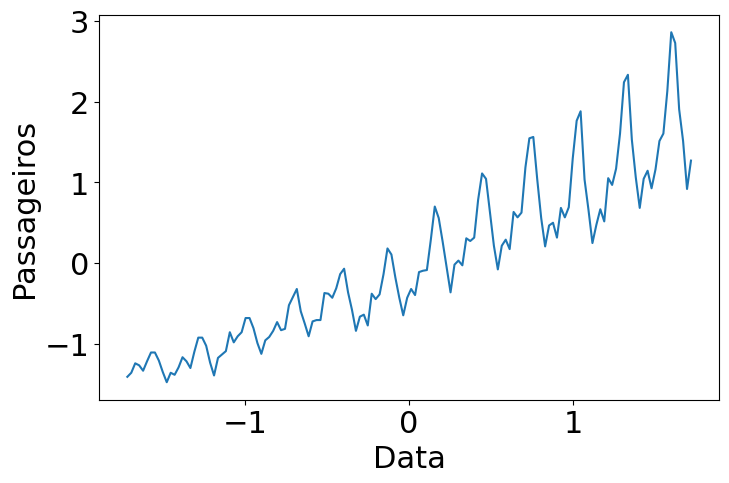

In [35]:
plt.plot(x,y, label='dado_escalado')
plt.ylabel("Passageiros")
plt.xlabel('Data')

## Dividindo treino e teste 

In [39]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

<Axes: >

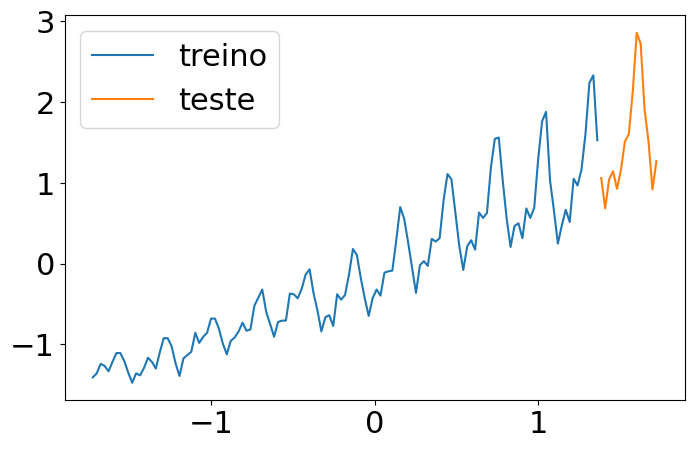

In [40]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

## regressão linear


In [44]:
regressor = Sequential()

regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

regressor.compile(loss='mean_squared_error',optimizer='adam')

regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/5 [=====>........................] - ETA: 0s - loss: 0.1306

5/5 [==============================] - 0s 766us/step


<Axes: >

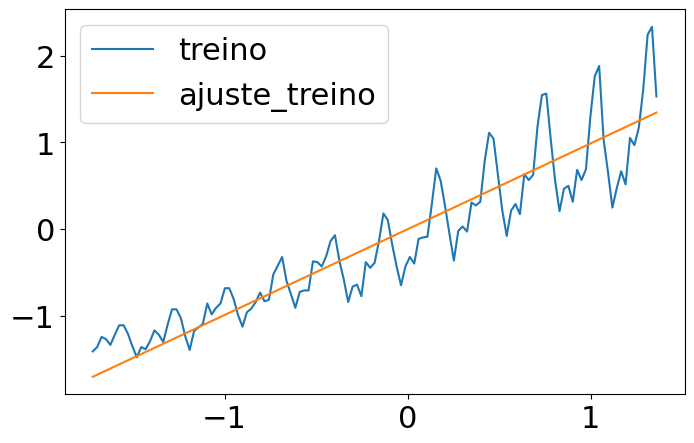

In [47]:
regressor.fit(xtreino,ytreino)

y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [50]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

resultados

,tempo,passageiros
0,-1.720064,-1.699801
1,-1.696007,-1.676028
2,-1.671950,-1.652255
3,-1.647894,-1.628481
4,-1.623837,-1.604708
...,...,...
124,1.262984,1.248106
125,1.287041,1.271879
126,1.311098,1.295653
127,1.335155,1.319426


<Axes: xlabel='tempo', ylabel='passageiros'>

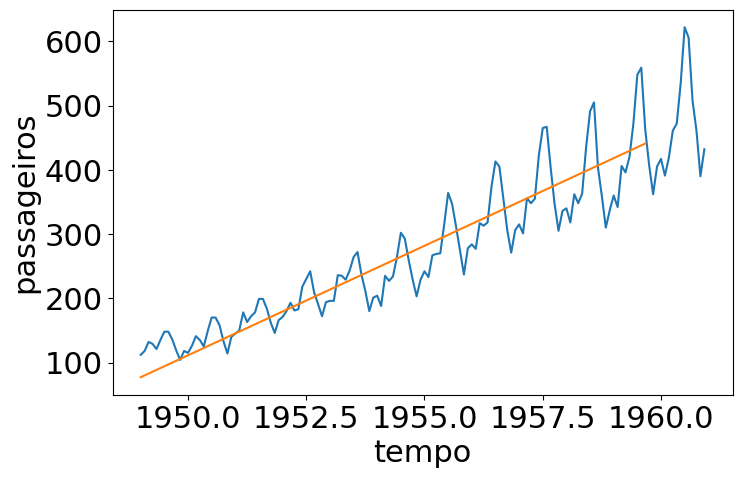

In [54]:
resultado_transf = sc.inverse_transform(resultados)

resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)


1/1 [==============================] - 0s 15ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

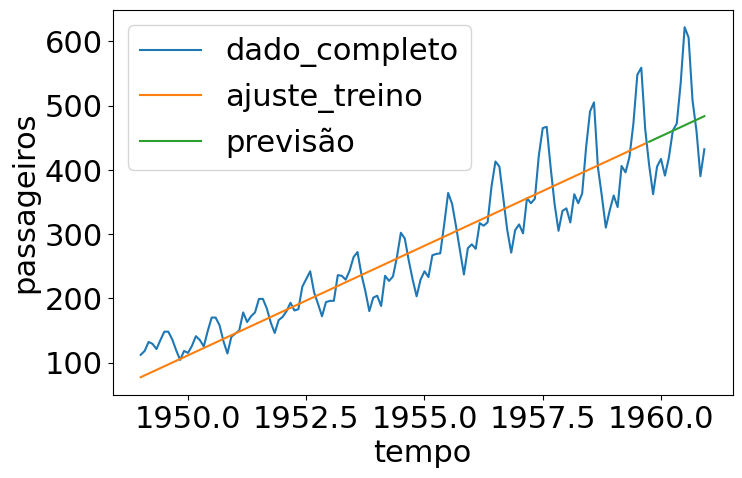

In [56]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

resultado_transf_teste = sc.inverse_transform(resultados_teste)

resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')


## Regressão não linear



In [59]:
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 8         
                                                                 
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8095
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8028
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7981
Epoch 4/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7954
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7947
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7948
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7942
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7929
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7909
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7892
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7874
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7852
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 18ms/step


<Axes: >

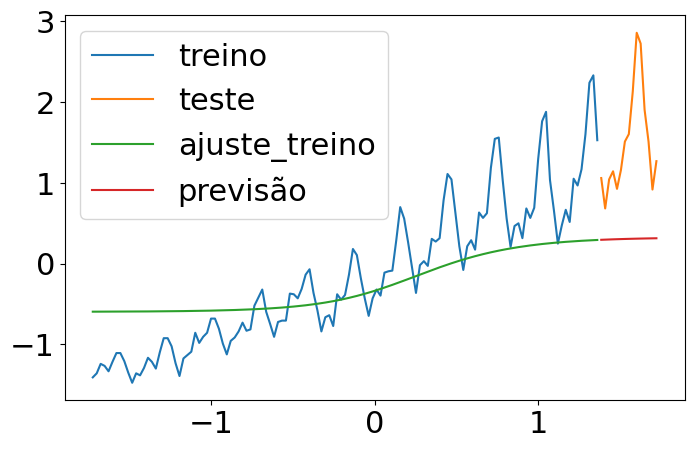

In [62]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

### Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [70]:
vetor = pd.DataFrame(ytreino)[0]
vetor.head()

0   -1.407779
1   -1.357590
2   -1.240483
3   -1.265578
4   -1.332496
Name: 0, dtype: float64

In [71]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [79]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

vetor2 = pd.DataFrame(yteste)[0]

xteste_novo, yteste_novo = separa_dados(vetor2,1)

regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8653
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7868
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7419
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7106
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6917
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6530
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6272
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6012
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5724
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5446
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5106
Epoch 13/100
4/4 [==============================] - 0s 1ms/st

4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='tempo', ylabel='0'>

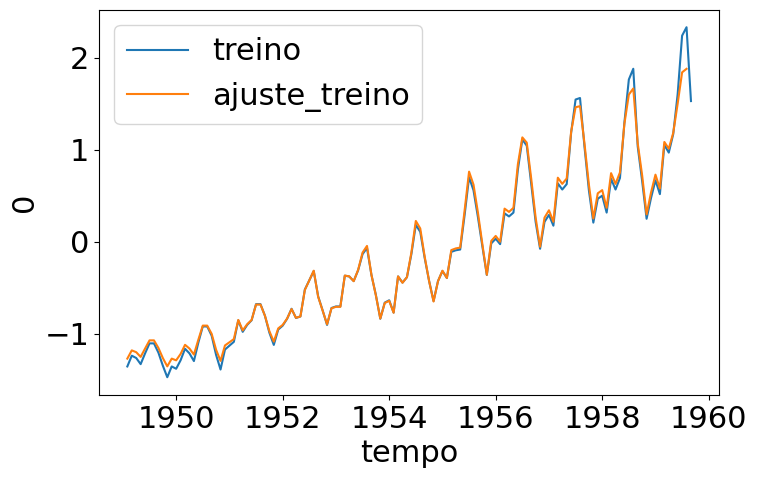

In [82]:
y_predict_novo = regressor3.predict(xtreino_novo)

sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

1/1 [==============================] - 0s 18ms/step


<Axes: xlabel='tempo', ylabel='0'>

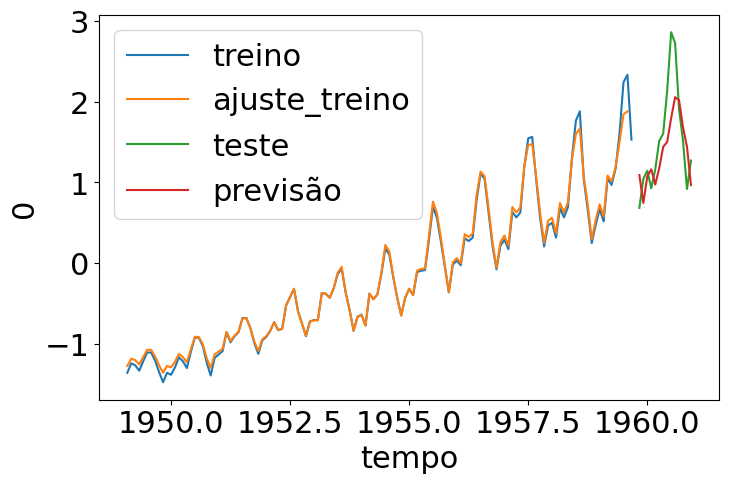

In [85]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [88]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

xteste_novo, yteste_novo = separa_dados(vetor2,4)


In [89]:
regressor4 = Sequential()

regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 32        
                                                                 
 dense_12 (Dense)            (None, 64)                512       
                                                                 
 dense_13 (Dense)            (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.8005
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7648
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7574
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7624
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7602
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7583
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7482
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7471
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7389
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7334
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7243
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7144
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 14ms/step


<Axes: xlabel='tempo', ylabel='0'>

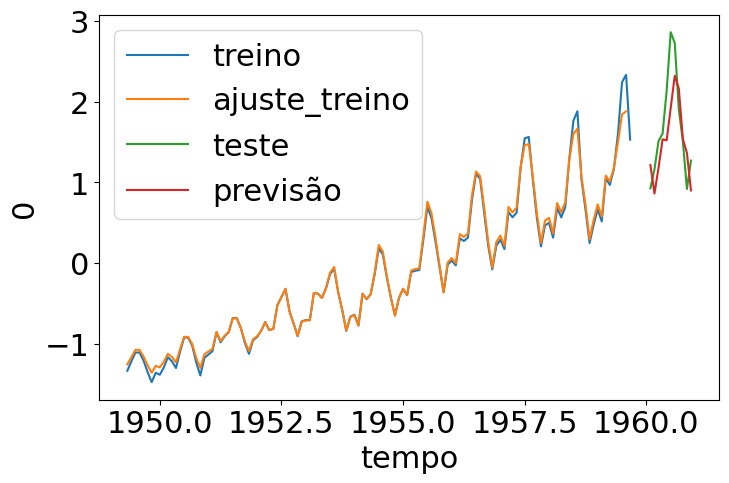

In [92]:
y_predict_teste_novo = regressor4.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

## Agora vamos criar uma LSTMs para para outra base de dados

In [96]:
bike = pd.read_csv('./Data/bicicletas.csv')
bike['datas'] = pd.to_datetime(bike['datas'])

bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

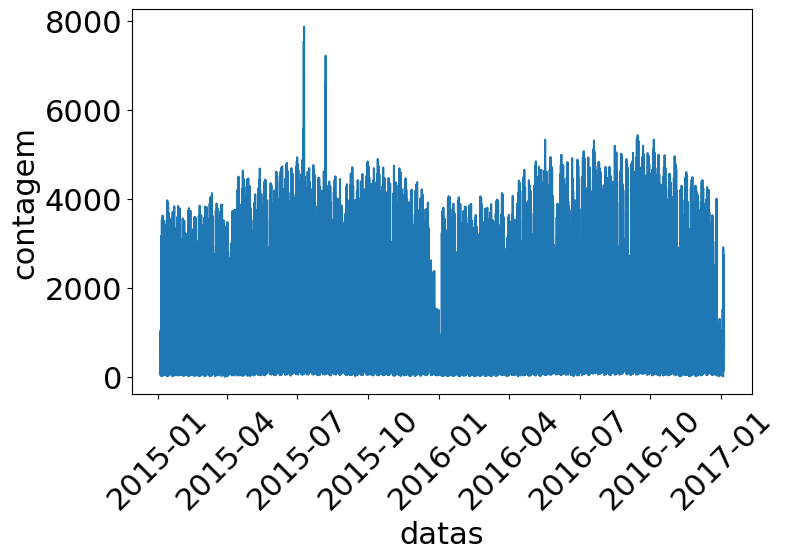

In [98]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=45)

In [102]:
sc2 = StandardScaler()

sc2.fit(bike['contagem'].values.reshape(-1,1))

y = sc2.transform(bike['contagem'].values.reshape(-1,1))

tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

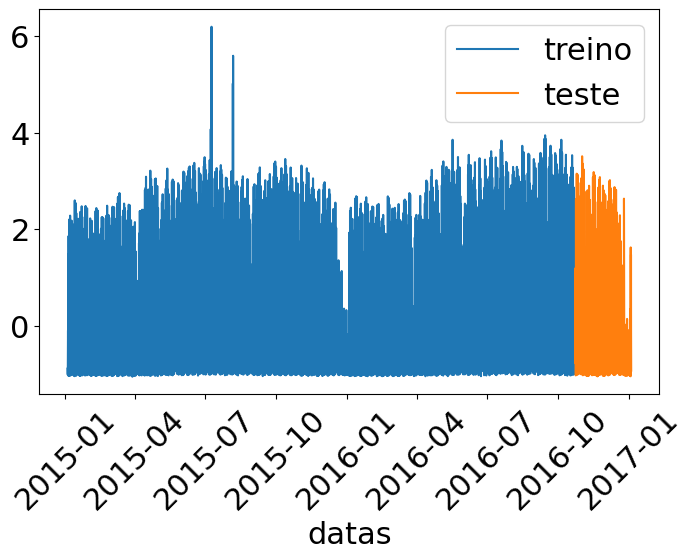

In [103]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=45) 

In [104]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [108]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,10)

xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))
xtreino_novo.shape

(15662, 10, 1)

In [110]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [112]:
recorrente = Sequential()

recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 6ms/step - loss: 0.2805 - val_loss: 0.1170
Epoch 2/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0811 - val_loss: 0.0453
Epoch 3/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0569 - val_loss: 0.0293
Epoch 4/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0492 - val_loss: 0.0304
Epoch 5/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0446 - val_loss: 0.0277
Epoch 6/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0416 - val_loss: 0.0295
Epoch 7/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0389 - val_loss: 0.0255
Epoch 8/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0376 - val_loss: 0.0239
Epoch 9/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0362 - val_loss: 0.0225
Epoch 10/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0352 - val_lo

490/490 [==============================] - 1s 2ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

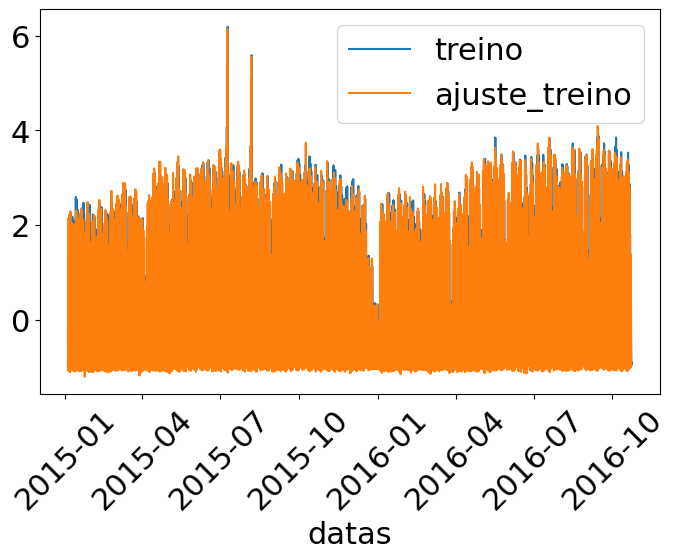

In [114]:
y_ajustado = recorrente.predict(xtreino_novo)

sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=45) 

55/55 [==============================] - 0s 2ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

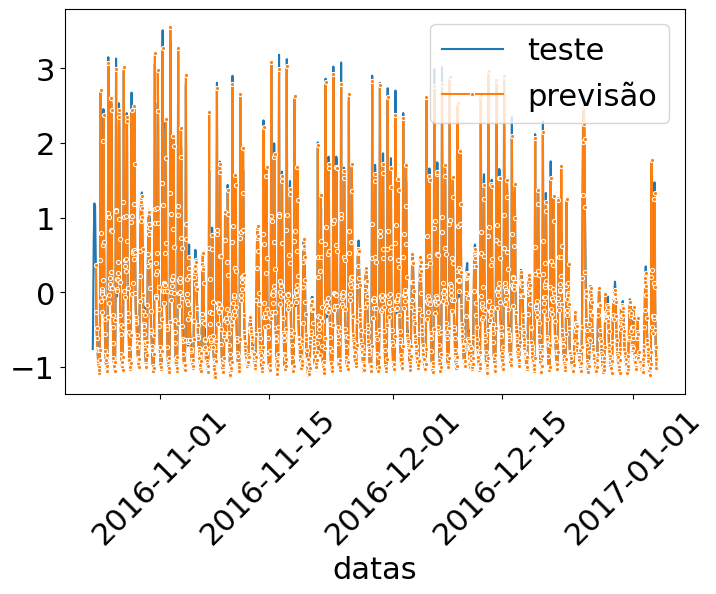

In [115]:
y_predito = recorrente.predict(xteste_novo)

sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=45) 

In [118]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 5ms/step - loss: 0.2288 - val_loss: 0.0724
Epoch 2/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0719 - val_loss: 0.0442
Epoch 3/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0538 - val_loss: 0.0293
Epoch 4/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0463 - val_loss: 0.0550
Epoch 5/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0414 - val_loss: 0.0242
Epoch 6/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0381 - val_loss: 0.0251
Epoch 7/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0364 - val_loss: 0.0229
Epoch 8/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0351 - val_loss: 0.0236
Epoch 9/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0340 - val_loss: 0.0194
Epoch 10/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0331 - val_lo

In [120]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 0s 1ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

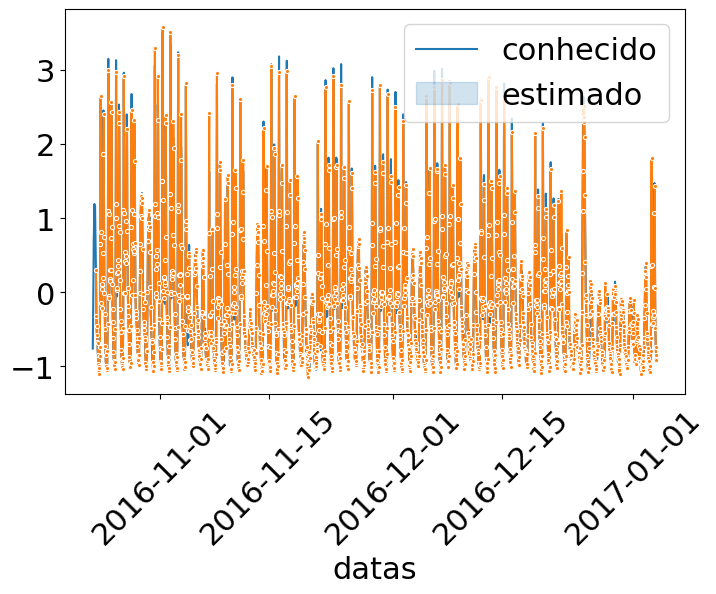

In [121]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=45) 

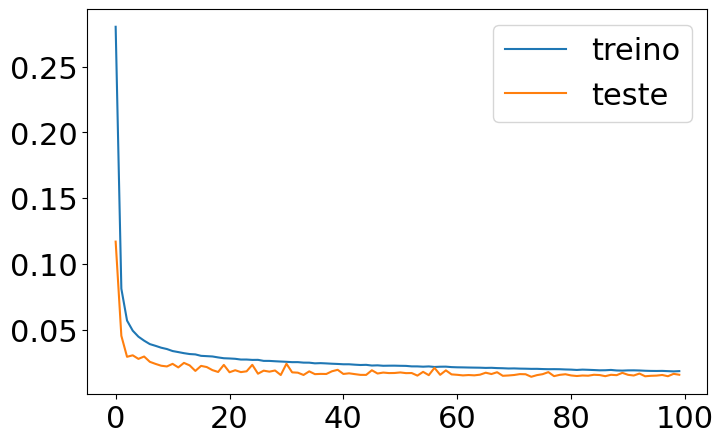

In [122]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])